In [107]:
#pip install geopandas
import geopandas as gpd
import pandas as pd
#import geoplot as gplt
#import geoplot.crs as gcrs
#import contextily as ctx
#from cartopy import crs as ccrs
import matplotlib.pyplot as plt
#import folium

In [108]:
coord = pd.read_csv(r'/Users/anacarolinaquintino/Documents/GitHub/Project4-WebScrap/Files/countries.csv')
unicorns = pd.read_csv(r'/Users/anacarolinaquintino/Documents/GitHub/Project4-WebScrap/Files/Unicorns&Countries.csv')

In [109]:
coord1 = coord[['Country','Latitude', 'Longitude']]
coord1[coord1['Country'].str.contains('korea')]
coord1['Country'] = coord1['Country'].replace(['US'], 'United States')
coord1['Country'] = coord1['Country'].replace(['Bahamas'], 'The Bahamas')
coord1['Country'] = coord1['Country'].replace(['Korea, South'], 'South Korea')

/var/folders/kh/8_xn31gj4qd2v1_npj4sxgr80000gn/T/ipykernel_5810/2901272606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coord1['Country'] = coord1['Country'].replace(['US'], 'United States')
/var/folders/kh/8_xn31gj4qd2v1_npj4sxgr80000gn/T/ipykernel_5810/2901272606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coord1['Country'] = coord1['Country'].replace(['Bahamas'], 'The Bahamas')
/var/folders/kh/8_xn31gj4qd2v1_npj4sxgr80000gn/T/ipykernel_5810/2901272606.py:5: SettingWithCopyWarning: 
A value

In [110]:
unicorns

,Unnamed: 0.1,Unnamed: 0,Name,Country,Industry,Valuation ($ Billion),score,nb_reviews,classification
0,0,0,Bytedance,China,Artificial Intelligence,140.0,3.175,130.0,bad
1,1,1,SpaceX,United States,Other,100.3,3.305,331.0,good
2,2,2,Shein,China,E-commerce & direct-to-consumer,100.0,3.175,130.0,bad
3,3,3,Stripe,United States,Fintech,95.0,3.305,331.0,good
4,4,4,Klarna,Sweden,Fintech,45.6,3.060,752.0,bad
...,...,...,...,...,...,...,...,...,...
1261,1261,1261,Dana,Indonesia,Financial technology,1.0,3.720,2250.0,good
1262,1262,1262,Neo Financial,Canada,Financial technology,1.0,3.060,1221.0,bad
1263,1263,1263,Physicswallah,India,Educational technology,1.1,3.490,428.0,good
1264,1264,1264,Onecard,India,Financial technology,1.4,3.490,428.0,good


In [111]:
uni_coord = pd.merge(unicorns, coord1, how='left', on='Country')


In [112]:
uni_coord['Latitude'] = uni_coord.apply(lambda country : 22.302711 if country['Country'] =='Hong Kong' else country['Latitude'], axis=1)
uni_coord['Longitude'] = uni_coord.apply(lambda country : 114.177216 if country['Country'] =='Hong Kong' else country['Longitude'], axis=1)
uni_coord['Latitude'] = uni_coord.apply(lambda country : 32.299507 if country['Country'] =='Bermuda' else country['Latitude'], axis=1)
uni_coord['Longitude'] = uni_coord.apply(lambda country : -64.790337 if country['Country'] =='Bermuda' else country['Longitude'], axis=1)

In [113]:
uni_coord

,Unnamed: 0.1,Unnamed: 0,Name,Country,Industry,Valuation ($ Billion),score,nb_reviews,classification,Latitude,Longitude
0,0,0,Bytedance,China,Artificial Intelligence,140.0,3.175,130.0,bad,35.000074,104.999927
1,1,1,SpaceX,United States,Other,100.3,3.305,331.0,good,39.783730,-100.445882
2,2,2,Shein,China,E-commerce & direct-to-consumer,100.0,3.175,130.0,bad,35.000074,104.999927
3,3,3,Stripe,United States,Fintech,95.0,3.305,331.0,good,39.783730,-100.445882
4,4,4,Klarna,Sweden,Fintech,45.6,3.060,752.0,bad,59.674971,14.520858
...,...,...,...,...,...,...,...,...,...,...,...
1261,1261,1261,Dana,Indonesia,Financial technology,1.0,3.720,2250.0,good,-2.483383,117.890285
1262,1262,1262,Neo Financial,Canada,Financial technology,1.0,3.060,1221.0,bad,61.066692,-107.991707
1263,1263,1263,Physicswallah,India,Educational technology,1.1,3.490,428.0,good,22.351115,78.667743
1264,1264,1264,Onecard,India,Financial technology,1.4,3.490,428.0,good,22.351115,78.667743


In [114]:
df11 =uni_coord.groupby(['Country','classification']).agg({ 'Name':'count'}).reset_index()
df11

,Country,classification,Name
0,Argentina,good,3
1,Australia,bad,9
2,Austria,bad,2
3,Bangladesh,bad,1
4,Belgium,bad,3
5,Bermuda,bad,1
6,Brazil,bad,23
7,Canada,bad,24
8,Chile,bad,2
9,China,bad,218


In [115]:
df_geo = gpd.GeoDataFrame(uni_coord, geometry = gpd.points_from_xy(uni_coord['Latitude'],uni_coord['Longitude']))

In [116]:
df_geo

,Unnamed: 0.1,Unnamed: 0,Name,Country,Industry,Valuation ($ Billion),score,nb_reviews,classification,Latitude,Longitude,geometry
0,0,0,Bytedance,China,Artificial Intelligence,140.0,3.175,130.0,bad,35.000074,104.999927,POINT (35.000 105.000)
1,1,1,SpaceX,United States,Other,100.3,3.305,331.0,good,39.783730,-100.445882,POINT (39.784 -100.446)
2,2,2,Shein,China,E-commerce & direct-to-consumer,100.0,3.175,130.0,bad,35.000074,104.999927,POINT (35.000 105.000)
3,3,3,Stripe,United States,Fintech,95.0,3.305,331.0,good,39.783730,-100.445882,POINT (39.784 -100.446)
4,4,4,Klarna,Sweden,Fintech,45.6,3.060,752.0,bad,59.674971,14.520858,POINT (59.675 14.521)
...,...,...,...,...,...,...,...,...,...,...,...,...
1261,1261,1261,Dana,Indonesia,Financial technology,1.0,3.720,2250.0,good,-2.483383,117.890285,POINT (-2.483 117.890)
1262,1262,1262,Neo Financial,Canada,Financial technology,1.0,3.060,1221.0,bad,61.066692,-107.991707,POINT (61.067 -107.992)
1263,1263,1263,Physicswallah,India,Educational technology,1.1,3.490,428.0,good,22.351115,78.667743,POINT (22.351 78.668)
1264,1264,1264,Onecard,India,Financial technology,1.4,3.490,428.0,good,22.351115,78.667743,POINT (22.351 78.668)


In [117]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world1 = world[world['continent']!= 'Antarctica'] 
world1

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [124]:
world1['name'] = world1['name'].replace(['Bahamas'], 'The Bahamas')
world1['name'] = world1['name'].replace(['United States of America'], 'United States')

/Users/anacarolinaquintino/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [166]:
try2 = pd.merge(world1, df11, how='left', left_on='name', right_on='Country')
try2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,classification,Name
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,bad,24.0
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,good,615.0
...,...,...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,NaN


In [126]:
try3 = pd.merge(df11, world1, how='left', left_on='Country', right_on='name')
try3

,Country,classification,Name,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,Argentina,good,3,4.493871e+07,South America,Argentina,ARG,445445.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
1,Australia,bad,9,2.536431e+07,Oceania,Australia,AUS,1396567.0,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907..."
2,Austria,bad,2,8.877067e+06,Europe,Austria,AUT,445075.0,"POLYGON ((16.97967 48.12350, 16.90375 47.71487..."
3,Bangladesh,bad,1,1.630462e+08,Asia,Bangladesh,BGD,302571.0,"POLYGON ((92.67272 22.04124, 92.65226 21.32405..."
4,Belgium,bad,3,1.148406e+07,Europe,Belgium,BEL,533097.0,"POLYGON ((6.15666 50.80372, 6.04307 50.12805, ..."
5,Bermuda,bad,1,NaN,NaN,NaN,NaN,NaN,None
6,Brazil,bad,23,2.110495e+08,South America,Brazil,BRA,1839758.0,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2..."
7,Canada,bad,24,3.758926e+07,North America,Canada,CAN,1736425.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
8,Chile,bad,2,1.895204e+07,South America,Chile,CHL,282318.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
9,China,bad,218,1.397715e+09,Asia,China,CHN,14342903.0,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."


In [127]:
try3[try3['name'].isna()]

,Country,classification,Name,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,Bermuda,bad,1,NaN,NaN,NaN,NaN,NaN,None
18,Hong Kong,bad,8,NaN,NaN,NaN,NaN,NaN,None
35,Singapore,bad,13,NaN,NaN,NaN,NaN,NaN,None


In [167]:
try2['Name'].fillna(0, inplace=True)

In [168]:
try2

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country,classification,Name
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,0.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,0.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,0.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,bad,24.0
4,328239523.0,North America,United States,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,good,615.0
...,...,...,...,...,...,...,...,...,...
171,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,0.0
172,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,0.0
173,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,0.0
174,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",NaN,NaN,0.0


In [159]:
try2.to_csv('coutry_coord.csv')

/Users/anacarolinaquintino/opt/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/anacarolinaquintino/opt/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 15
  Warn("Warning: setting k to %d" % k_q, UserWarning)


(-198.0, 198.00000000000006, -62.574678, 90.607978)

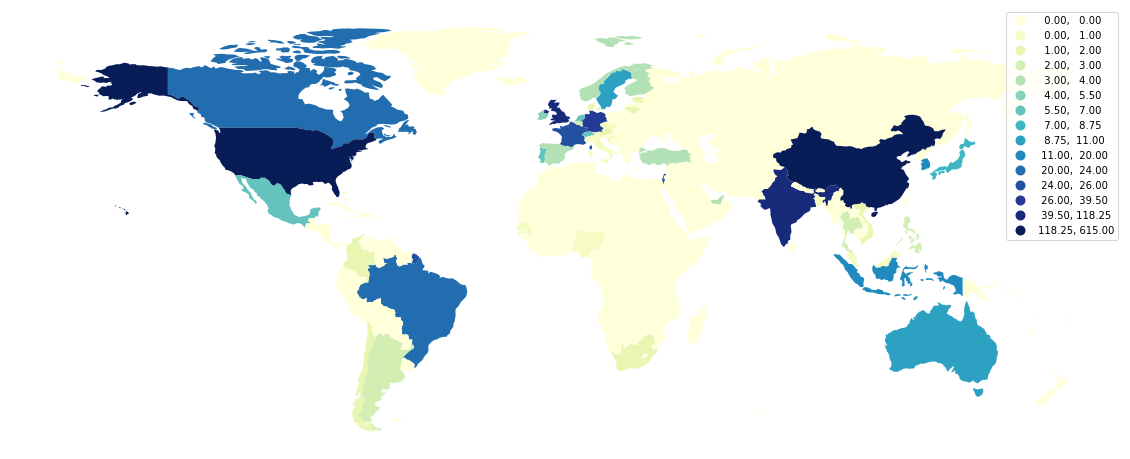

In [190]:
try2.plot(column='Name', cmap='YlGnBu', legend=True, scheme='quantiles', k=100, figsize=(20, 15))
plt.axis('off')

/Users/anacarolinaquintino/opt/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/Users/anacarolinaquintino/opt/anaconda3/lib/python3.9/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 15
  Warn("Warning: setting k to %d" % k_q, UserWarning)


(-198.0, 198.00000000000006, -62.574678, 90.607978)

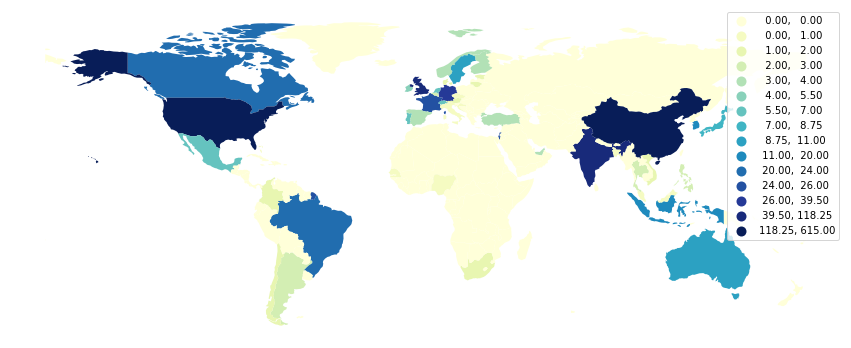

In [188]:
fig06, ax = plt.subplots(figsize = (15, 10))
try2.plot(ax=ax, column='Name', cmap='YlGnBu', legend=True, scheme='quantiles', k=100, figsize=(20, 15))
plt.axis('off')
   